# lab 5 naivebase

Initial Dataset:
   Survived  Pclass   Age  SibSp  Parch     Fare Embarked
0         0       3  22.0      1      0   7.2500        S
1         1       1  38.0      1      0  71.2833        C
2         1       3  26.0      0      0   7.9250        S
3         1       1  35.0      1      0  53.1000        S
4         0       3  35.0      0      0   8.0500        S 

Dataset after handling missing values:
   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked
0         0       3  22.0      1      0   7.2500         2
1         1       1  38.0      1      0  71.2833         0
2         1       3  26.0      0      0   7.9250         2
3         1       1  35.0      1      0  53.1000         2
4         0       3  35.0      0      0   8.0500         2 

Training Features:
     Pclass   Age  SibSp  Parch     Fare  Embarked
331       1  45.5      0      0  28.5000         2
733       2  23.0      0      0  13.0000         2
382       3  32.0      0      0   7.9250         2
704       3  26

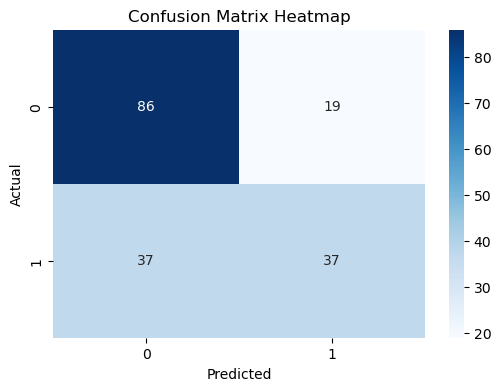

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"Titanic-Dataset (1).csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

print("Initial Dataset:")
print(df.head(), "\n")

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

print("Dataset after handling missing values:")
print(df.head(), "\n")

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:")
print(X_train.head(), "\n")
print("Training Labels:")
print(y_train.head(), "\n")

print("Testing Features:")
print(X_test.head(), "\n")
print("Testing Labels:")
print(y_test.head(), "\n")

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm, "\n")
print("Accuracy:", accuracy, "\n")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
